In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use("seaborn-v0_8")


In [ ]:
DATA_PATH = "/content/drive/MyDrive/uidai_hackathon/data/processed/lifecycle_aggregated.csv"
FIG_PATH = "/content/drive/MyDrive/uidai_hackathon/figures/final"

df = pd.read_csv(DATA_PATH, parse_dates=["date"])
df.head()


,date,state,district_x,pincode_x,age_0_5,age_5_17,age_18_greater,district_y,pincode_y,demo_age_5_17,demo_age_17_,district,pincode,bio_age_5_17,bio_age_17_,total_enrolment,demographic_updates,biometric_updates,DUI,BUBI
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,0,0.0,0.0,0.0,0,0.0,0.0,0.0,109,0.0,0.0,0.0,0.0
1,2025-03-09,Bihar,SitamarhiSitamarhiPurbi ChamparanSitamarhiSita...,6723137,206,633,166,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1005,0.0,0.0,0.0,0.0
2,2025-03-09,Delhi,West DelhiWest Delhi,220077,122,53,57,0,0.0,0.0,0.0,0,0.0,0.0,0.0,232,0.0,0.0,0.0,0.0
3,2025-03-09,Haryana,FaridabadGurugram,243005,98,79,23,0,0.0,0.0,0.0,0,0.0,0.0,0.0,200,0.0,0.0,0.0,0.0
4,2025-03-09,Karnataka,Bengaluru UrbanBengaluru UrbanBengaluru UrbanB...,2240159,63,80,105,0,0.0,0.0,0.0,0,0.0,0.0,0.0,248,0.0,0.0,0.0,0.0


In [ ]:
state_metrics = (
    df.groupby("state")[["DUI", "BUBI"]]
    .mean()
    .reset_index()
)

state_metrics.head()


,state,DUI,BUBI
0,100000,0.000000,0.000000
1,Andaman & Nicobar Islands,5.365000,2.550000
2,Andaman and Nicobar Islands,10.967518,25.143275
3,Andhra Pradesh,22.486865,90.250368
4,Arunachal Pradesh,6.869670,16.680961


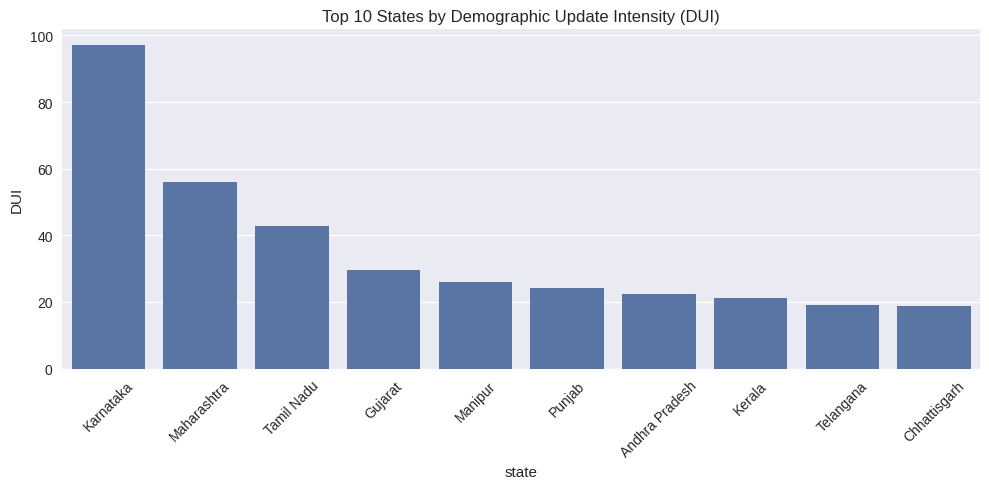

In [ ]:
top_dui = state_metrics.sort_values("DUI", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_dui, x="state", y="DUI")
plt.title("Top 10 States by Demographic Update Intensity (DUI)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{FIG_PATH}/top10_states_dui.png", dpi=300)
plt.show()


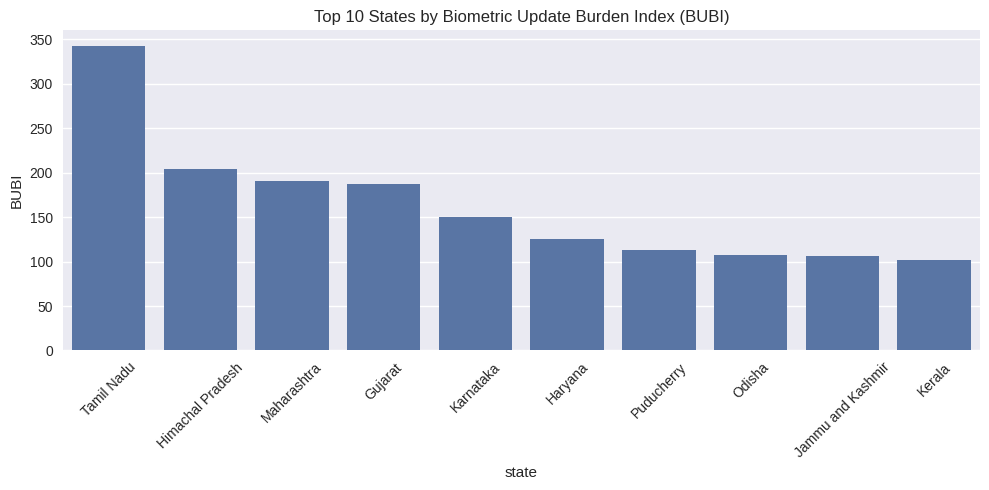

In [ ]:
top_bubi = state_metrics.sort_values("BUBI", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_bubi, x="state", y="BUBI")
plt.title("Top 10 States by Biometric Update Burden Index (BUBI)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{FIG_PATH}/top10_states_bubi.png", dpi=300)
plt.show()


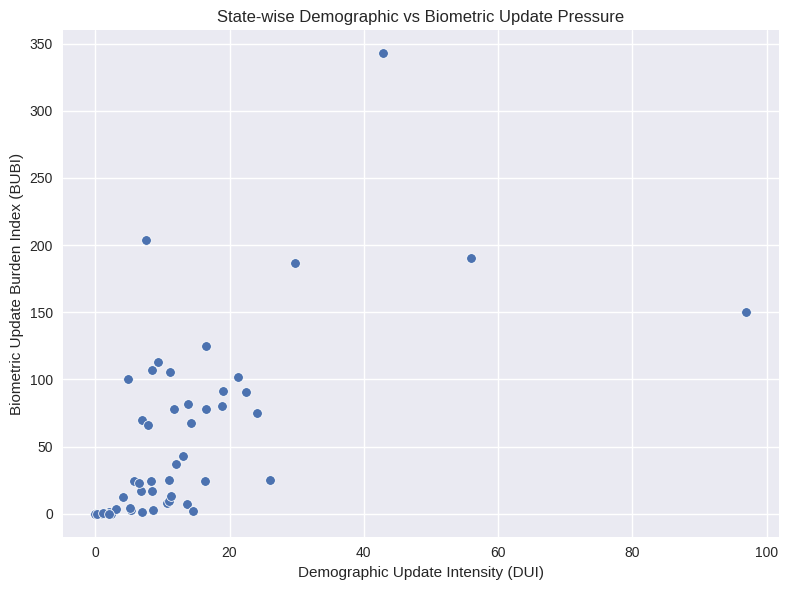

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=state_metrics,
    x="DUI",
    y="BUBI"
)

plt.title("State-wise Demographic vs Biometric Update Pressure")
plt.xlabel("Demographic Update Intensity (DUI)")
plt.ylabel("Biometric Update Burden Index (BUBI)")
plt.tight_layout()
plt.savefig(f"{FIG_PATH}/dui_vs_bubi_scatter.png", dpi=300)
plt.show()


In [ ]:
os.listdir(FIG_PATH)


['national_enrolment_trend.png',
 'agewise_enrolment_trend.png',
 'top10_states_enrolment.png',
 'top10_states_dui.png',
 'top10_states_bubi.png',
 'dui_vs_bubi_scatter.png']